In [1]:
import torch
import torchvision
from torchvision import transforms, datasets

In [2]:
train = datasets.MNIST("", train=True, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True, 
                       transform=transforms.Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [4]:
for data in trainset:
#     print(data)
    break;

In [5]:
x, y = data[0][0], data[1][0]

print(y)

tensor(5)


In [6]:
import matplotlib.pyplot as plt

In [7]:
print(data[0][0].shape)

torch.Size([1, 28, 28])


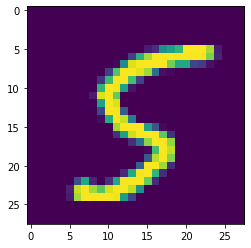

In [8]:
plt.imshow(data[0][0].view([28, 28]))
plt.show()

In [9]:
total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1
        
print(counter_dict)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [10]:
for i in counter_dict:
    print(f'{i}: {counter_dict[i]/total*100}%')

0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


In [11]:
import torch.nn as nn
import torch.nn.functional as F

In [12]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [13]:
X = torch.rand((28, 28))
X = X.view(-1, 28*28)

In [14]:
output = net(X)
print(output)

tensor([[-2.3727, -2.1761, -2.2640, -2.3372, -2.3619, -2.2423, -2.3153, -2.4005,
         -2.3215, -2.2561]], grad_fn=<LogSoftmaxBackward>)


In [15]:
import torch.optim as optim

In [16]:
optimizer = optim.Adam(net.parameters(), lr=0.001)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.1125, grad_fn=<NllLossBackward>)
tensor(0.4901, grad_fn=<NllLossBackward>)
tensor(0.0015, grad_fn=<NllLossBackward>)


In [17]:
correct = 0
total = 0
X_list = []
gt_list = []
pred_list = []

with torch.no_grad():
    for data in testset:
        X, y = data        
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            X_list.append(X[idx])
            gt_list.append(y[idx])
            pred_list.append(torch.argmax(i))

print(f'Accuracy: {round(correct/total, 3)*100}%')

Accuracy: 96.7%


In [18]:
# %matplotlib qt

In [ ]:
# for i in range(len(X_list)):
#     plt.imshow(X_list[i].view((28, 28)))
#     plt.title(f'Prediction: {pred_list[i]}, Ground Truth: {gt_list[i]}')
#     if pred_list[i] != gt_list[i]:
#         plt.waitforbuttonpress(0)
#     plt.close()